### Muwei is working on this part of project. First updated 11.11

#### 11.13: refine codes

## 1.What kind of jobs can get the highest salary in the current days?

#### Expecting more categories of jobs.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import re
import seaborn as sns
from scipy import stats
import sys

In [2]:
eng_data=pd.read_csv('./Scraper/archive/engineering-jobs-job-results.csv')
fn_data=pd.read_csv('./Scraper/archive/finance-jobs-job-results.csv')
int_data=pd.read_csv('./Scraper/archive/intern-jobs-job-results.csv')
it_data=pd.read_csv('./Scraper/archive/it-jobs-job-results.csv')
mk_data=pd.read_csv('./Scraper/archive/marketing-jobs-job-results.csv')

In [6]:
# compute average salary of each category of job
def salary_of_category(job_data):
    '''
    for all non-0 input
    compute average
    '''
    d = job_data[job_data.Salary.notnull()]['Salary'] # leave out the missing values
    p = d.str.replace('k', '').str.replace('$', '').apply(lambda x: pd.Series(x.split('-')))    
    p = p.astype('int') #.dtypes
    return p

In [7]:
# Data frame of low / high salary
ave_eng = (salary_of_category(eng_data))
ave_fn  = (salary_of_category(fn_data))
ave_it  = (salary_of_category(it_data))
ave_mk  = (salary_of_category(mk_data))

In [8]:
# low / high average
salary_eng = ave_eng.sum()/len(ave_eng)
salary_fn  = ave_fn.sum()/len(ave_fn)
salary_it  = ave_it.sum()/len(ave_it)
salary_mk  = ave_mk.sum()/len(ave_mk)

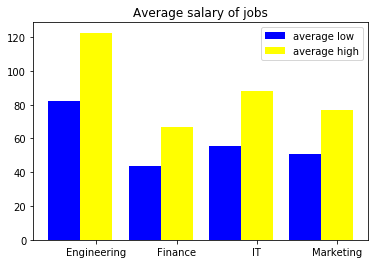

In [14]:
# plot graph
name_list = ['Engineering','Finance','IT','Marketing']
num_list1 = [salary_eng[0],salary_fn[0],salary_it[0],salary_mk[0]]
num_list2 = [salary_eng[1],salary_fn[1],salary_it[1],salary_mk[1]]
x =list(range(len(num_list1)))
total_width, n = 0.8, 2
width = total_width / n
plt.bar(x, num_list1, width=width, label='average low', color = 'blue')
for i in range(len(x)):
    x[i] = x[i] + width
plt.bar(x, num_list2, width=width, label='average high', tick_label = name_list, color = 'yellow')
plt.legend()
plt.title('Average salary of jobs',fontsize='large')
plt.show()

### The distribution of salary in each category

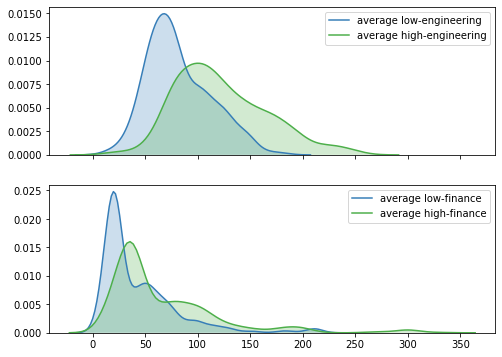

In [219]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(8, 6))
c1, c2, c3 = sns.color_palette('Set1', 3)
sns.kdeplot(ave_eng[0], label = 'average low-engineering', shade=True, color=c2, ax=ax1)
sns.kdeplot(ave_eng[1], label = 'average high-engineering',shade=True, color=c3, ax=ax1)
sns.kdeplot(ave_fn[0], label = 'average low-finance', shade=True, color=c2, ax=ax2)
sns.kdeplot(ave_fn[1], label = 'average high-finance',shade=True, color=c3, ax=ax2)
#sns.kdeplot(ave_it[0], label = 'average low', shade=True, color=c1, ax=ax3)
#sns.kdeplot(ave_it[1], label = 'average high',shade=True, color=c2, ax=ax3)
#sns.kdeplot(ave_mk[0], label = 'average low', shade=True, color=c1, ax=ax4)
#sns.kdeplot(ave_mk[1], label = 'average high',shade=True, color=c2, ax=ax4)

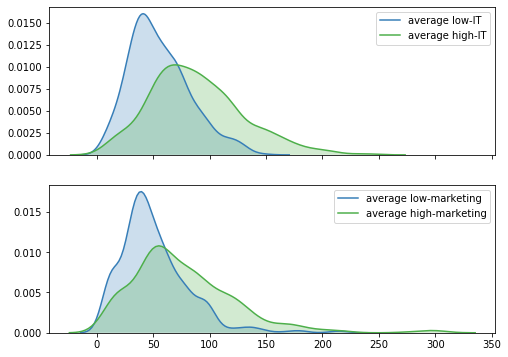

In [220]:
f, (ax3, ax4) = plt.subplots(2, 1, sharex=True, figsize=(8, 6))
c1, c2, c3 = sns.color_palette('Set1', 3)
sns.kdeplot(ave_it[0], label = 'average low-IT', shade=True, color=c2, ax=ax3)
sns.kdeplot(ave_it[1], label = 'average high-IT',shade=True, color=c3, ax=ax3)
sns.kdeplot(ave_mk[0], label = 'average low-marketing', shade=True, color=c2, ax=ax4)
sns.kdeplot(ave_mk[1], label = 'average high-marketing',shade=True, color=c3, ax=ax4)

## 2.What is the distribution of job opportunities among different categories?
### a. Most frequent words in job titles

In [240]:
def most_frequent_words(job_data):
    d = job_data[job_data.Name.notnull()]['Name']
    regex_pat = re.compile(r'[{}]+'.format('!.,;:?"\/#&+-'), flags=re.IGNORECASE)
    p = d.str.replace(regex_pat, '')
    p = p.apply(lambda x: pd.Series(x.split(' ')))    
    p = p[p.notnull()]
    #p = pd.Series(p)
    
    # compute frequency
    #fre = p.columns.value_counts()
    
    
    return p

In [241]:
most_frequent_words(eng_data)

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,Product,Engineer,I,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Software,Engineer,,University,Graduate,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Project,Engineer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Head,of,Engineering,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Senior,Hardware,Engineer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
955,Senior,Software,Engineer,,Web,and,Mobile,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
956,Sr,Software,Engineer,,BackEnd,,Lenexa,KS,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
957,Senior,Software,Development,Engineer,(Content,Team),NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
958,Sr,Program,Engineer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [228]:
most_frequent_words(fn_data)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,Finance,Manager,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Finance,Analyst,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Financial,Analyst,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Finance,Manager,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Finance,Manager,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
953,RADIOGRAPHER,,CATSCAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
954,CHARGE,NURSE,,ADULT,PROGRESSIVE,CARE,,SFMC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
955,PARAMEDICEMERG,DEPTPRMC,,EMERGENCY,ROOM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
956,MDNEUROLOGY,HOSPITALISTCDS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [615]:
most_frequent_words(it_data)

[('it', 519),
 ('support', 176),
 ('specialist', 150),
 ('engineer', 145),
 ('manager', 139),
 ('systems', 102),
 ('analyst', 88),
 ('senior', 88),
 ('administrator', 71),
 ('project', 56),
 ('network', 52),
 ('business', 43),
 ('technician', 42),
 ('security', 41),
 ('technical', 38),
 ('system', 37),
 ('information', 36),
 ('sr', 35),
 ('technology', 34),
 ('desk', 33),
 ('application', 31),
 ('and', 30),
 ('i', 28),
 ('services', 27),
 ('director', 27)]

In [623]:
most_frequent_words(mk_data)

[('marketing', 547),
 ('manager', 237),
 ('sales', 220),
 ('and', 92),
 ('director', 91),
 ('specialist', 78),
 ('representative', 77),
 ('coordinator', 58),
 ('associate', 58),
 ('senior', 54),
 ('digital', 52),
 ('of', 51),
 ('product', 42),
 ('account', 37),
 ('assistant', 31),
 ('executive', 28),
 ('development', 27),
 ('customer', 25),
 ('sr', 25),
 ('consultant', 21),
 ('lead', 21),
 ('software', 20),
 ('outside', 19),
 ('engineer', 19),
 ('business', 18)]

### b. Unique job titles (remove the duplicates)